In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
import os
import copy
from helper import * 

In [2]:

style_img = image_loader("vangogh_portrait.jpg")
content_img = image_loader("monalisa.jpg")



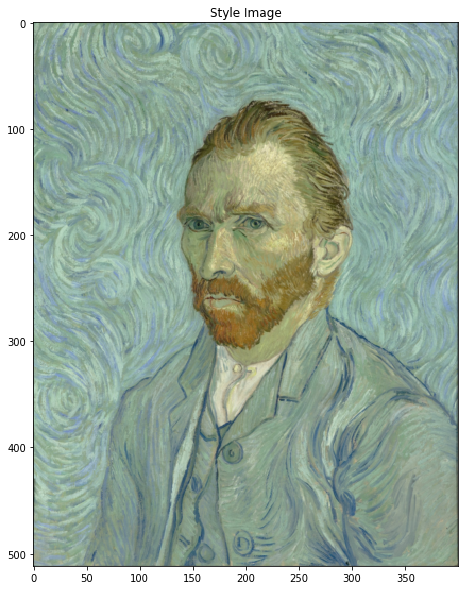

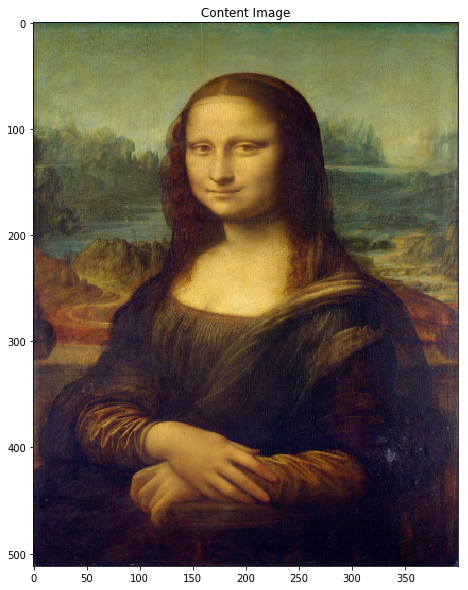

In [3]:
plt.ion()

plt.figure(figsize = (20,10))
imshow(style_img, title='Style Image')

plt.figure(figsize = (20,10))
imshow(content_img, title='Content Image')

In [4]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

In [5]:
# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']


In [6]:
input_img = content_img.clone()


In [7]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img,content_layers_default,style_layers_default)

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 119.487000 Content Loss: 8.501723

run [100]:
Style Loss : 45.354050 Content Loss: 8.981793

run [150]:
Style Loss : 20.811672 Content Loss: 8.037833

run [200]:
Style Loss : 6.961078 Content Loss: 6.854013

run [250]:
Style Loss : 2.312567 Content Loss: 5.530743

run [300]:
Style Loss : 1.286438 Content Loss: 4.512726



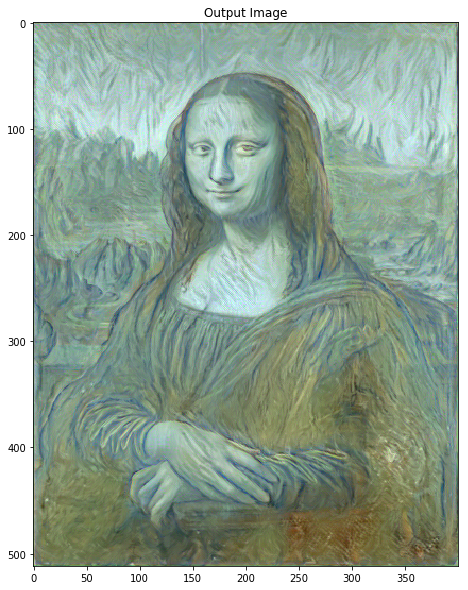

In [8]:
plt.figure(figsize = (20,10))
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()